In [29]:
import numpy as np
import scipy as sp
from scipy.integrate import ode

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Single Oscillator

External force $F(t)$

"Perceived happiness" $x$: 
$$\frac{d^2x}{dt^2} = -a x - b v + F(t)$$

"Actual happiness" $v$:
$$v = \frac{dx}{dt}$$

In [31]:
#damped oscillator equation
def oscillator(t, y, F):
    b = 1
    a = .25
    x = y[0]
    v = y[1]

    dxdt = v
    Ft = F(t)
    dvdt = -a*x -b*v + Ft
    
    f = [dxdt, dvdt]
    return(f)
    

In [32]:
t0 = 0
y0 = [0,0]
t1 = 20
dt = .1

#Forcing equation
F = lambda x: 1 if x < 1 else np.cos(2*np.pi*x) if (x > 10 and x < 15) else 0


r = ode(oscillator)
r.set_initial_value(y0, t0).set_f_params(F)

t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

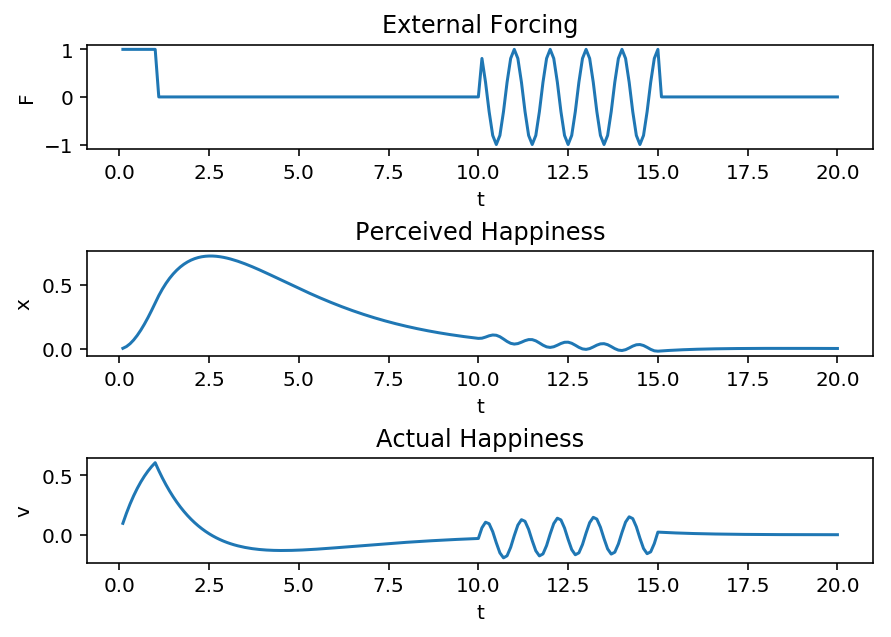

In [33]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, y[:,0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, y[:,1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')

plt.show()

# Multiple Oscillators

## (Linear interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r\mathbf{x} + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [34]:
#damped oscillator equation
def network_lin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, x) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [35]:
N = 2

t0 = 0
y0 = np.array([[0,1],[0,-1]])
t1 = 100
dt = .1

#Weights
Wr = np.ones((N,N))
np.fill_diagonal(Wr, 0)

Wi = [1,-1]

#Forcing
F = lambda x: 0 if x < 15 else 1 #np.cos(x)

r = ode(network_lin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [36]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

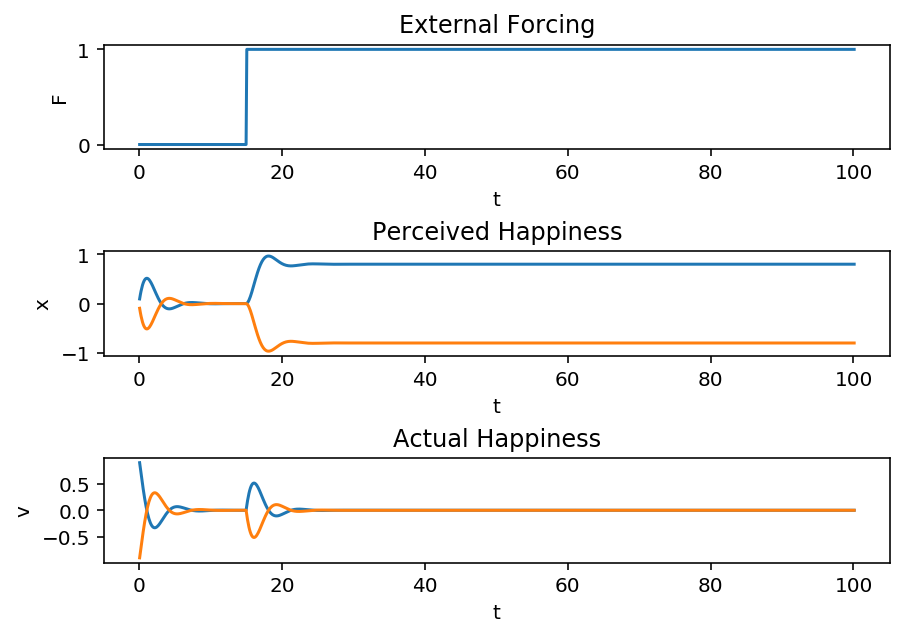

In [37]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')


## (Tanh interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r tanh(\mathbf{x}) + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [38]:
#damped oscillator equation
def network_nonlin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, np.tanh(x)) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [39]:
N = 2

t0 = 0
y0 = np.array([[0,1],[0,-1]])
t1 = 100
dt = .1

#Weights
Wr = np.ones((N,N))
np.fill_diagonal(Wr, 0)

Wi = [1,-1]

#Forcing
F = lambda x: 0 if x < 15 else 1 #np.cos(x)

r = ode(network_nonlin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [40]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

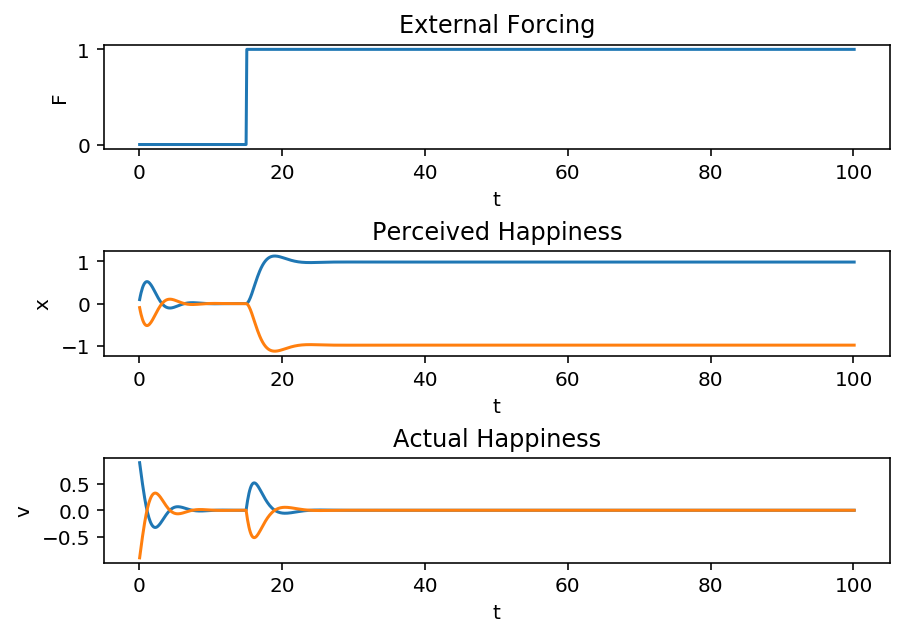

In [41]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)


axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')


# Bigger network

## (Linear interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r \mathbf{x} + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [42]:
#damped oscillator equation
def network_lin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, x) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [43]:
N = 100

t0 = 0
y0 = np.ones((N, 2))
y0[:,1] = 1
t1 = 3
dt = .1

#Weights
Wr = np.random.randn(N,N)
np.fill_diagonal(Wr, 0)

Wi = np.random.randn(N)

#Forcing
F = lambda x: 0 

r = ode(network_lin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [44]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

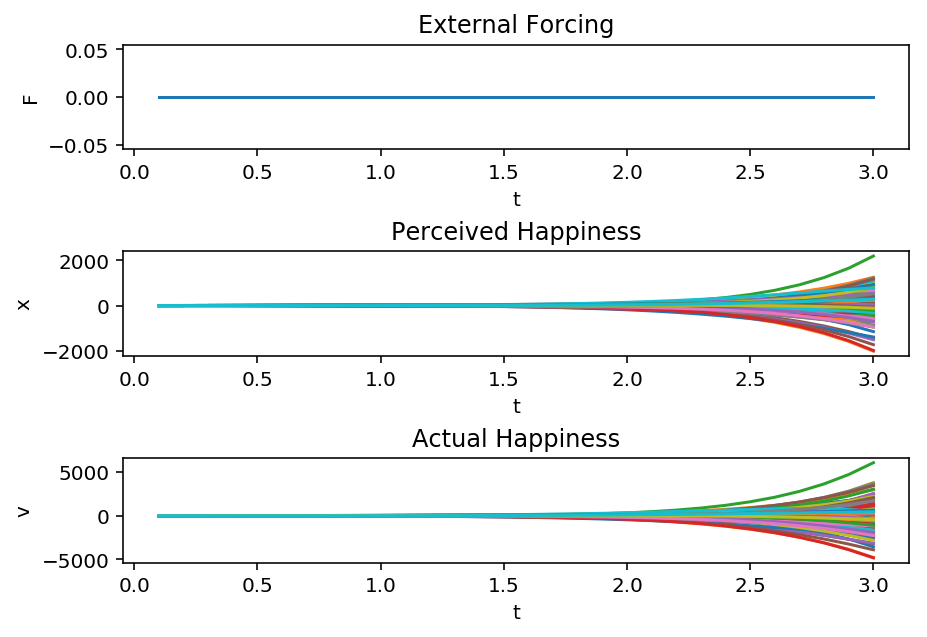

In [45]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')


## (Tanh interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r tanh(\mathbf{x}) + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [46]:
#damped oscillator equation
def network_nonlin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, np.tanh(x)) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [53]:
N = 100

t0 = 0
y0 = np.ones((N, 2))
y0[:,1] = 0
t1 = 100
dt = .1

#Weights
Wr = np.random.randn(N,N)/np.sqrt(N)
np.fill_diagonal(Wr, 0)

Wi = np.random.randn(N)

#Forcing
F = lambda x: 0 if x < 15 else 0 if x > 20 else 0 #np.cos(x)

r = ode(network_nonlin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [54]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

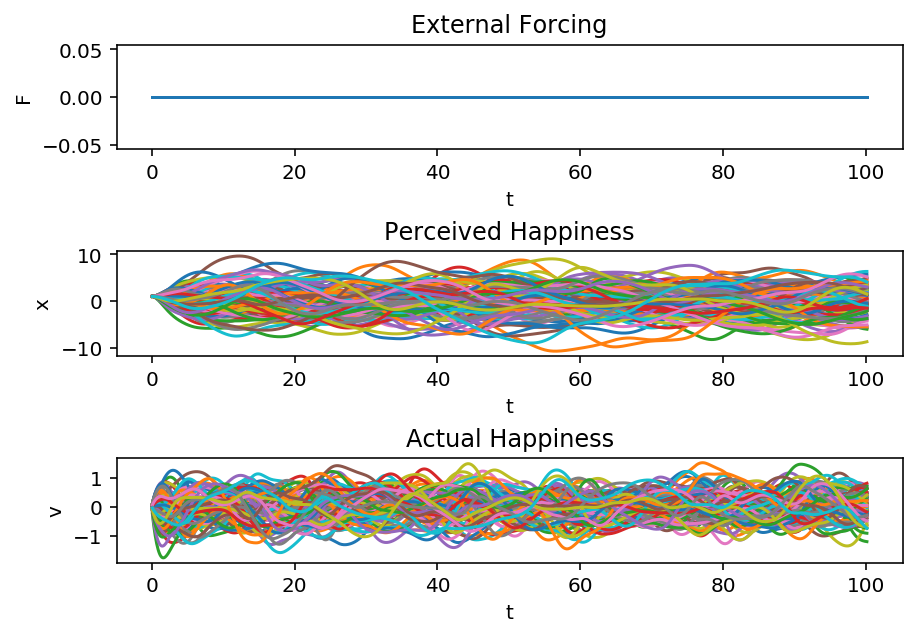

In [55]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')
    
    